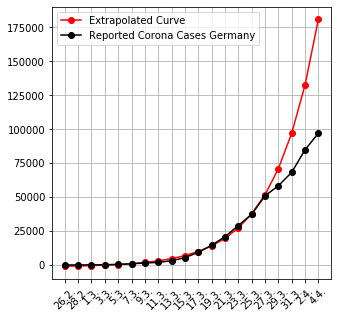

In [8]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

"""
Source: Johns Hopkins Website
https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
26.02. : 27
28.02. : 48
01.03. : 130
03.03. : 196
05.03. : 481 
07.03. : 847
09.03. : 1250 (estimated)
11.03. : 1908 (21:00)
13.03. : 3156 
15.03. : 5426 (21:00)
17.03. : 9340 
19.03. : 14481 (21:00)
21.03. : 20809 
 22.03. : 23974 (19:00)
23.03. : 29056 (21:30)
25.03. : 37300
27.03. : 50900
29.03. : 58300 (16:00)
31.03. : 68180 (21:00)
02.04. : 84800
04.04. : 97000 (estimated)
"""

def func(x, a, b, c):
    return a * np.exp(b * x) + c

"""
Estimate parameters
"""
yn  = np.array([27., 48., 130., 196., 481., 847.0, 1500, 1908, 3156, 5426, 9340, 14481, 20809, 29056, 37300, 50900])
yn2 = np.array([27., 48., 130., 196., 481., 847.0, 1500, 1908, 3156, 5426, 9340, 14481, 20809, 29056, 37300, 50900, 58300, 68180, 84800,97000 ])
xn  = np.arange(len(yn))
xn2 = np.arange(len(yn2))
popt, pcov = curve_fit(func, xn, yn)

"""
Prediction
"""
time_index = pd.date_range('2020-02-26', '2020-4-4', freq='d')
ticklabels = [str(item.day)+"."+str(item.month)+"." for item in time_index[::2]]
xp = np.arange(len(ticklabels))

"""
Plotting
"""                          
infected = func(xp, *popt)
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(xp, func(xp, *popt), 'ro-', label="Extrapolated Curve")
ax.plot(xn2, yn2, 'ko-', label="Reported Corona Cases Germany")
ax.set_xticks(xp)
ax.set_xticklabels(ticklabels, rotation = 45)
ax.legend()
plt.grid()
plt.show()


[ 77.77777778 170.83333333  50.76923077 145.40816327  76.09147609
  77.09563164  27.2         65.40880503  71.92648923  72.13416882
  55.04282655  43.6986396   39.63189005  28.37279736  36.46112601
  14.53831041  16.94682676  24.37665004  14.38679245]


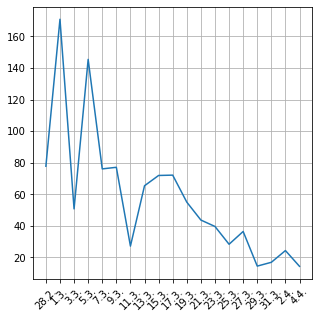

In [12]:
growth = ((yn2[1:]/yn2[0:-1])-1.0)*100
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(growth)
ax.set_xticks(xp[0:-1])
ax.set_xticklabels(ticklabels[1:], rotation = 45)
plt.grid()
plt.show()

In [17]:
for i in range(1, len(yn2)):
    for j in range(0,i+1):
        if yn2[i]/yn2[i-j] >= 2.0:
            print(i, j*2, yn2[i], yn2[i-j])
            break;

2 2 130.0 48.0
3 4 196.0 48.0
4 2 481.0 196.0
5 4 847.0 196.0
6 4 1500.0 481.0
7 4 1908.0 847.0
8 4 3156.0 1500.0
9 4 5426.0 1908.0
10 4 9340.0 3156.0
11 4 14481.0 5426.0
12 4 20809.0 9340.0
13 4 29056.0 14481.0
14 6 37300.0 14481.0
15 6 50900.0 20809.0
16 6 58300.0 29056.0
17 8 68180.0 29056.0
18 8 84800.0 37300.0
19 10 97000.0 37300.0
